In [11]:
using Dates

In [56]:
include("MC.jl")

hybrid (generic function with 1 method)

In [1]:
include("viz.jl");

In [2]:
default(fmt=:png, dpi=:120)

In [3]:
ENV["COLUMNS"] = 200;
const N = 30;

In [4]:
fn_berlin = "irradiation_Berlin.nc"

"irradiation_Berlin.nc"

In [2]:
fn_berlin_w  = "irradiation_Berlin_W.nc";

### Funcs

In [2]:
fn_athens = "irradiation_Athens.nc"
fn_berlin = "irradiation_Berlin.nc";

In [5]:
ncinfo(fn_berlin)


##### NetCDF File #####

C:\Users\xinyuan.hou\solCast\irradiation_Berlin.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
altitude                                            1                         
latitude                                            1                         
time                                                558048                    
longitude                                           1                         

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
rely                            DOUBLE          longitude latitude altitude ti..
altitude                        DOUBLE          altitude                        
time                            INT             time                      

In [8]:
    fn_ = joinpath("data", fn_berlin)

"data\\irradiation_Berlin.nc"

In [8]:
    ghi = getNCvar(fn_, "GHI")
    ghiCS = getNCvar(fn_, "CLEAR_SKY_GHI");

In [ ]:
    cmf = ghi ./ ghiCS
    cmf_train = cmf[1:523007] # 2004 - 2018
    cmf_test = cmf[523008:end] # 2019

In [53]:
data_train, data_test = getCMF(fn_berlin)

([0.25300818171573625, 0.25114843250478547, 0.22158832728772718, 0.18179115729880074, 0.15113926484883422, 0.165566104963329, 0.3466782860167718, 0.31671983957807137, 0.36398169822529436, 0.41458791214159674  …  0.4847562973172902, 0.42879282344472974, 0.562585022521856, 0.5562563972920771, 0.740902732523057, 0.8464298692171635, 0.8553437322878059, 0.8214015279512967, 0.8961348158326929, 0.9577757923480762], [0.44469196601764, 0.4351617737683957, 0.269436723419728, 0.17068227409802456, 0.1429488917122064, 0.15129203466407165, 0.2401452489621812, 0.22737657362189478, 0.18280183122008878, 0.18156954657218516  …  0.3512261624529648, 0.3654462465213288, 0.43314935585746206, 0.5053020493139164, 0.5916213600795741, 0.653059553669952, 0.7160528373997062, 0.7139817138829445, 0.8317632961413673, 0.9169679834730434])

In [54]:
data_train_cls, binStarts, binMean = getBins(data_train, N) # city-specific
data_test_cls = classify(data_test, binStarts);

In [57]:
df21 = getDF(2, 1, N) #; test_neib=test_neib_w)

LoadError: MethodError: no method matching ^(::Tuple{Int64}, ::Int64)
[0mClosest candidates are:
[0m  ^([91m::Union{AbstractChar, AbstractString}[39m, ::Integer) at strings/basic.jl:718
[0m  ^([91m::UniformScaling[39m, ::Number) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\LinearAlgebra\src\uniformscaling.jl:298
[0m  ^([91m::Symmetric{var"#s832", S} where {var"#s832"<:Real, S<:(AbstractMatrix{var"#s832"} where var"#s832"<:var"#s832")}[39m, ::Integer) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\LinearAlgebra\src\symmetric.jl:868
[0m  ...

In [12]:
cols = [:yr, :mo, :d, :hr, :min, :ghi, :ghiCS]
vars = ["ut_year", "ut_month", "ut_day", "ut_hour", "ut_minute", "GHI", "CLEAR_SKY_GHI"];

dateDic = Dict(zip(cols, vars))

Dict{Symbol, String} with 7 entries:
  :d     => "ut_day"
  :hr    => "ut_hour"
  :ghi   => "GHI"
  :ghiCS => "CLEAR_SKY_GHI"
  :yr    => "ut_year"
  :mo    => "ut_month"
  :min   => "ut_minute"

In [13]:
for (c, v) in dateDic
    @eval $c = getNCvar(fn_, $v)
end

In [19]:
year

558048-element Vector{Int16}:
 2004
 2004
 2004
 2004
 2004
 2004
 2004
 2004
 2004
 2004
 2004
 2004
 2004
    ⋮
 2019
 2019
 2019
 2019
 2019
 2019
 2019
 2019
 2019
 2019
 2019
 2020

In [16]:
df = DataFrame(:year=>yr, :month=>mo, :day=>d, :hour=>hr, :minute=>min)

,year,month,day,hour,minute
,Int16,Int8,Int8,Int8,Int8
1,2004,2,1,0,15
2,2004,2,1,0,30
3,2004,2,1,0,45
4,2004,2,1,1,0
5,2004,2,1,1,15
6,2004,2,1,1,30
7,2004,2,1,1,45
8,2004,2,1,2,0
9,2004,2,1,2,15


In [18]:
dt = map(df -> DateTime(df.year, df.month, df.day, df.hour, df.minute), eachrow(df))

558048-element Vector{DateTime}:
 2004-02-01T00:15:00
 2004-02-01T00:30:00
 2004-02-01T00:45:00
 2004-02-01T01:00:00
 2004-02-01T01:15:00
 2004-02-01T01:30:00
 2004-02-01T01:45:00
 2004-02-01T02:00:00
 2004-02-01T02:15:00
 2004-02-01T02:30:00
 2004-02-01T02:45:00
 2004-02-01T03:00:00
 2004-02-01T03:15:00
 ⋮
 2019-12-31T21:15:00
 2019-12-31T21:30:00
 2019-12-31T21:45:00
 2019-12-31T22:00:00
 2019-12-31T22:15:00
 2019-12-31T22:30:00
 2019-12-31T22:45:00
 2019-12-31T23:00:00
 2019-12-31T23:15:00
 2019-12-31T23:30:00
 2019-12-31T23:45:00
 2020-01-01T00:00:00

In [36]:
df1 = DataFrame(:time=>dt, :ghi=>ghi, :ghiCS=>ghiCS)

,time,ghi,ghiCS
,DateTime,Float64,Float64
1,2004-02-01T00:15:00,0.0,0.0
2,2004-02-01T00:30:00,0.0,0.0
3,2004-02-01T00:45:00,0.0,0.0
4,2004-02-01T01:00:00,0.0,0.0
5,2004-02-01T01:15:00,0.0,0.0
6,2004-02-01T01:30:00,0.0,0.0
7,2004-02-01T01:45:00,0.0,0.0
8,2004-02-01T02:00:00,0.0,0.0
9,2004-02-01T02:15:00,0.0,0.0


In [48]:
df1_train = df1[1:523007, :]

,time,ghi,ghiCS
,DateTime,Float64,Float64
1,2004-02-01T00:15:00,0.0,0.0
2,2004-02-01T00:30:00,0.0,0.0
3,2004-02-01T00:45:00,0.0,0.0
4,2004-02-01T01:00:00,0.0,0.0
5,2004-02-01T01:15:00,0.0,0.0
6,2004-02-01T01:30:00,0.0,0.0
7,2004-02-01T01:45:00,0.0,0.0
8,2004-02-01T02:00:00,0.0,0.0
9,2004-02-01T02:15:00,0.0,0.0


In [49]:
df1_test = df1[523008:end, :]

,time,ghi,ghiCS
,DateTime,Float64,Float64
1,2019-01-01T00:00:00,0.0,0.0
2,2019-01-01T00:15:00,0.0,0.0
3,2019-01-01T00:30:00,0.0,0.0
4,2019-01-01T00:45:00,0.0,0.0
5,2019-01-01T01:00:00,0.0,0.0
6,2019-01-01T01:15:00,0.0,0.0
7,2019-01-01T01:30:00,0.0,0.0
8,2019-01-01T01:45:00,0.0,0.0
9,2019-01-01T02:00:00,0.0,0.0


In [50]:
function calCMF(df1)
    df2 = filter(:ghi => g -> (!iszero(g) & !isnan(g)), df1)
    df2.cmf = df2.ghi ./ df2.ghiCS
    return df2
end

calCMF (generic function with 1 method)

In [51]:
df_test = calCMF(df1_test)

,time,ghi,ghiCS,cmf
,DateTime,Float64,Float64,Float64
1,2019-01-01T07:30:00,0.0437946,0.0984829,0.444692
2,2019-01-01T07:45:00,1.11554,2.5635,0.435162
3,2019-01-01T08:00:00,1.95644,7.26123,0.269437
4,2019-01-01T08:15:00,2.19264,12.8464,0.170682
5,2019-01-01T08:30:00,2.67955,18.7448,0.142949
6,2019-01-01T08:45:00,3.72535,24.6236,0.151292
7,2019-01-01T09:00:00,7.27156,30.2799,0.240145
8,2019-01-01T09:15:00,8.06943,35.4893,0.227377
9,2019-01-01T09:30:00,7.34271,40.1676,0.182802


In [ ]:
ghis = [:ghi_a, :ghiCS_a, :ghi_b, :ghiCS_b];

In [ ]:
ghiVarNames = repeat(["GHI", "CLEAR_SKY_GHI"], 2)

In [ ]:
fnams = repeat([fn_athens, fn_berlin], inner=2)

In [ ]:
for i in 1:length(ghis)
#     println(ghis[i], " ", ghiVarNames[i], " ", fnams[i])
    ghis[i] = getNCvar(fnams[i], ghiVarNames[i])
end

In [ ]:
ghi_a = dropdims(ncread(fn_athens, "GHI"); dims=(1,2,3))

In [ ]:
ghiCS_a = dropdims(ncread(fn_athens, "CLEAR_SKY_GHI"); dims=(1,2,3));

In [ ]:
cmf_a = ghi_a ./ ghiCS_a

In [10]:
di = OrderedDict("year" => year, "month" => month, "day" => day) #,
df = DataFrame(di)

,year,month,day
,Int16,Int8,Int8
1,2004,2,1
2,2004,2,1
3,2004,2,1
4,2004,2,1
5,2004,2,1
6,2004,2,1
7,2004,2,1
8,2004,2,1
9,2004,2,1


In [11]:
df[523007-5:523007+5,:]

,year,month,day
,Int16,Int8,Int8
1,2018,12,31
2,2018,12,31
3,2018,12,31
4,2018,12,31
5,2018,12,31
6,2018,12,31
7,2019,1,1
8,2019,1,1
9,2019,1,1


In [ ]:
          "GHI_a" => ghi_a, "GHI_CS_a" => ghiCS_a, 
          "GHI_b" => ghi_b, "GHI_CS_b" => ghiCS_b);

In [ ]:
df = DataFrame(di);

df[!, :CMF_a] = ghi_a ./ ghiCS_a
df[!, :CMF_b] = ghi_b ./ ghiCS_b;

In [4]:
ghi_b = dropdims(ncread(fn_berlin, "GHI"); dims=(1,2,3))
ghiCS_b = dropdims(ncread(fn_berlin, "CLEAR_SKY_GHI"); dims=(1,2,3));

In [5]:
cmf_b = ghi_b ./ ghiCS_b

cmf_b_train = cmf_b[1:523007]
cmf_b_test = cmf_b[523008:end];

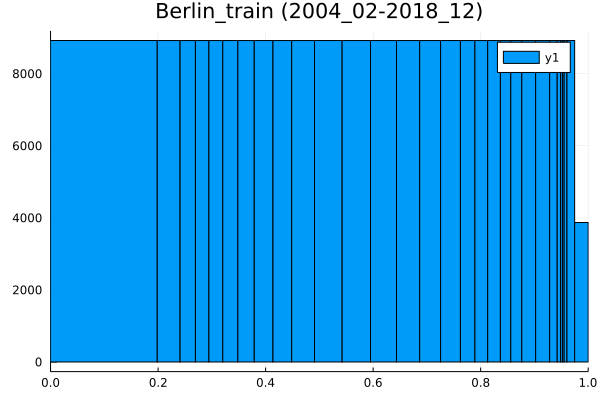

In [24]:
hist_b_train = histogram(cmf_b_train, #normalize=:probability, 
    bins=qx_ep, #    leg=false,
    xlim=(0,1), #ylim=(0,0.15), xlabel="CMF", ylabel="Frequency", lw=0.3, 
    title="Berlin_train (2004_02-2018_12)")

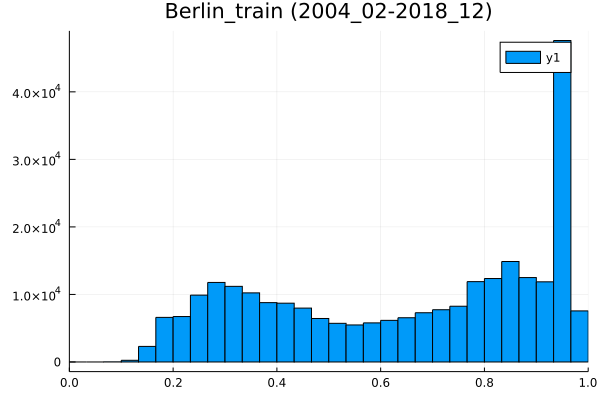

In [26]:
hist_b_train = histogram(cmf_b_train, #normalize=:probability, 
    bins=qx_el, #    leg=false,
    xlim=(0,1), #ylim=(0,0.15), xlabel="CMF", ylabel="Frequency", lw=0.3, 
    title="Berlin_train (2004_02-2018_12)")

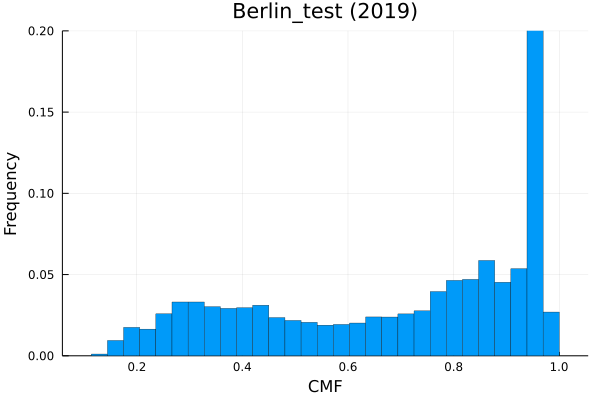

In [19]:
hist_b_test = histogram(cmf_bb_test, normalize=:probability, bins=range(minimum(cmf_bb_test),stop = maximum(cmf_bb_test), length =30), leg=false, #xlim=(0,1), 
    ylim=(0,0.2), xlabel="CMF", ylabel="Frequency", lw=0.3,
    title="Berlin_test (2019)")

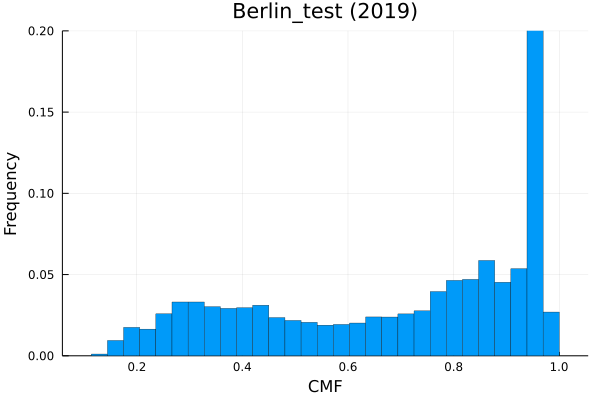

In [19]:
hist_b_test = histogram(cmf_bb_test, normalize=:probability, bins=range(minimum(cmf_bb_test),stop = maximum(cmf_bb_test), length =30), leg=false, #xlim=(0,1), 
    ylim=(0,0.2), xlabel="CMF", ylabel="Frequency", lw=0.3,
    title="Berlin_test (2019)")

In [7]:
cmf_bb_train = dropnan(cmf_b_train)
cmf_bb_test = dropnan(cmf_b_test);

In [7]:
describe(cmf_bb_train)

Summary Stats:
Length:         267607
Missing Count:  0
Mean:           0.656000
Minimum:        0.090035
1st Quartile:   0.396534
Median:         0.725460
3rd Quartile:   0.916181
Maximum:        1.000000
Type:           Float64


In [134]:
describe(cmf_bb_test)

Summary Stats:
Length:         17979
Missing Count:  0
Mean:           0.690538
Minimum:        0.114077
1st Quartile:   0.448584
Median:         0.779447
3rd Quartile:   0.937052
Maximum:        1.000000
Type:           Float64


In [147]:
function MCFit(cmf_data, n; steps=1) # num_states, time steps
#     state = ceil.((cmf_data .- min) ./ binWidth)
#     state[argmin(state)] = 1
    state = floor.((cmf_data .- min) ./ binWidth)    
    state = Int16.(state)
    state[state .< 1] .= 1

    T = zeros(n, n) # transition matrix
    len = length(cmf_data)
    for i in 2:len
        T[ state[i-1], state[i] ] = T[ state[i-1], state[i] ] + 1
    end

    # normalize T
    rowSums = sum(T; dims=2)
    T_norm = T ./ rowSums

    TT = T_norm ^ steps
    return TT # normalized transition matrix
end

MCFit (generic function with 1 method)

In [66]:
function MCForecast(T, binWidth, obsPoint) 
    binStarts = [min .+ (i-1) * binWidth for i = 1:n]
    obsBin = sum(obsPoint .≥ binStarts) + 1 
    return binStarts, T[obsBin, :] # piece-wise uniform distribution
end

MCForecast (generic function with 1 method)

In [120]:
function MCRand(binStarts, transProbs)
    probCDF = cumsum(transProbs)
    randWithinCDF = rand(Uniform(), count)
    randWithinBin = rand(Uniform(0, binWidth), count)

    fcstSamples = zeros(count)
    for i in 1:count
        binIdx = sum(randWithinCDF[i] .≤ probCDF) + 1
        fcstSamples[i] = binStarts[binIdx] + randWithinBin[i]
    end

    return Float64.(fcstSamples)
end

MCRand (generic function with 3 methods)

In [136]:
cmf_train = cmf_bb_train # training data

n = 30 # num_states or bins
# count = 100 #_000 # num_samples from predictive distribution

min = minimum(cmf_train)
max = maximum(cmf_train)
binWidth = (max - min) / n

In [148]:
T = MCFit(cmf_train, n; steps=1) # time step

30×30 Matrix{Float64}:
 0.405437     0.322695     0.152482     …  0.0          0.0
 0.0647881    0.431995     0.232305        0.0          0.0
 0.0231889    0.161814     0.328707        0.000169262  0.000169262
 0.00427602   0.0706281    0.139782        0.000147449  0.00117959
 0.000940439  0.0291536    0.0643678       0.000731452  0.0014629
 0.000277316  0.00813459   0.031614     …  0.000554631  0.0012017
 0.000493583  0.00523198   0.0140178       0.000493583  0.000197433
 0.00170648   0.0155717    0.018558        0.000106655  0.000746587
 0.000733048  0.0096518    0.00843005      0.000610874  0.000366524
 0.0          0.0250127    0.0385983       0.000888776  0.000253936
 0.0          0.000525762  0.0226078    …  0.00105152   0.000394322
 0.0          0.0          0.00219849      0.00376884   0.000942211
 0.0          0.0          0.000540249     0.000360166  0.000540249
 ⋮                                      ⋱               
 0.0          0.00015186   0.0             0.000607441  0

In [115]:
# forecast from random
binStarts = [min .+ (i-1) * binWidth for i = 1:n]

30-element Vector{Float64}:
 0.0900346482311115
 0.12036682662340778
 0.15069900501570407
 0.18103118340800034
 0.21136336180029663
 0.24169554019259293
 0.2720277185848892
 0.30235989697718546
 0.33269207536948175
 0.36302425376177805
 0.39335643215407434
 0.42368861054637064
 0.45402078893866693
 ⋮
 0.6360138592924446
 0.6663460376847409
 0.6966782160770372
 0.7270103944693335
 0.7573425728616298
 0.787674751253926
 0.8180069296462223
 0.8483391080385186
 0.8786712864308149
 0.9090034648231111
 0.9393356432154074
 0.9696678216077037

In [106]:
cmf_test = cmf_bb_test
count = length(cmf_test)

17979

In [149]:
randWithinCDF = rand(Uniform(), count)
randWithinBin = rand(Uniform(0, binWidth), count)
fcst = zeros(count);

In [150]:
for i in 1:count
    obsPoint = cmf_test[i]
    obsBin = sum(obsPoint .≥ binStarts)
    transProbs = T[obsBin, :]    
    probCDF = cumsum(transProbs)
    binIdx = sum(randWithinCDF[i] .> probCDF) 
    if binIdx == 0
        binIdx = 1
    end
#     if !(1 ≤ binIdx ≤ 30)
        
#         println(i)
#     end
    fcst[i] = binStarts[binIdx] + randWithinBin[i]
end
fcst

17979-element Vector{Float64}:
 0.3468447803931097
 0.4752657964334184
 0.2594494243608603
 0.1965607645414775
 0.09288530354211386
 0.13209153745952187
 0.2330614837060312
 0.26182619105869076
 0.15333071282832916
 0.351962308543484
 0.15020958755016628
 0.14892261684326513
 0.16796799414102684
 ⋮
 0.36117131159613086
 0.6402169656186364
 0.33937907096433834
 0.2601120123838084
 0.3581003171064797
 0.4482171006923494
 0.6031555549902712
 0.6120375545483606
 0.6081855843547535
 0.8263208570482249
 0.8064838534326307
 0.886103127870447

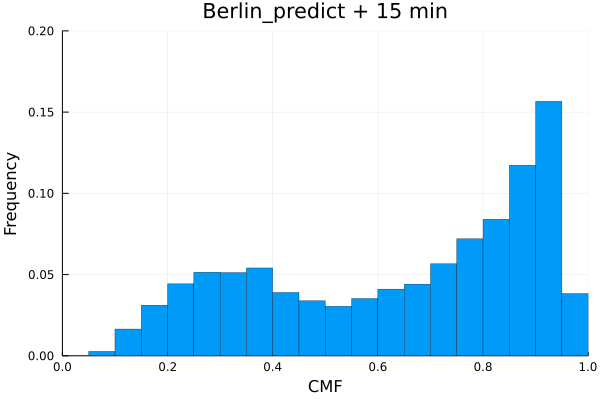

In [151]:
histogram(fcst, normalize=:probability, bins=n, lw=0.3, leg=false,
    xlim=(0,1), ylim=(0,0.2), xlabel="CMF", ylabel="Frequency", 
    title="Berlin_predict + 15 min")

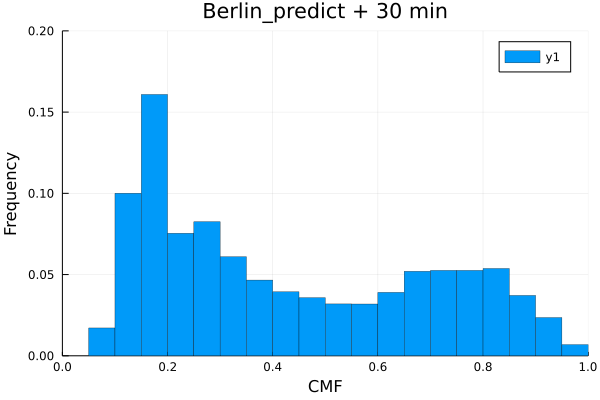

In [98]:
histogram(fcst, normalize=:probability, bins=n, lw=0.3, 
    xlim=(0,1), ylim=(0,0.2), xlabel="CMF", ylabel="Frequency", 
    title="Berlin_predict + 30 min")

### apply piecewise to series

In [88]:
count = 1

1

In [99]:
cmf_test = cmf_bb_test
len = 100 #length(cmf_test)

100

In [107]:
cmf_bb_test

17979-element Vector{Float64}:
 0.44469196601764
 0.4351617737683957
 0.269436723419728
 0.17068227409802456
 0.1429488917122064
 0.15129203466407165
 0.2401452489621812
 0.22737657362189478
 0.18280183122008878
 0.18156954657218516
 0.18007800118079556
 0.17809116453805593
 0.18458954524943652
 ⋮
 0.403451396683371
 0.37111900127524317
 0.3512261624529648
 0.3654462465213288
 0.43314935585746206
 0.5053020493139164
 0.5916213600795741
 0.653059553669952
 0.7160528373997062
 0.7139817138829445
 0.8317632961413673
 0.9169679834730434

In [109]:
obsPoint = cmf_test[1]

0.44469196601764

In [110]:
binStarts, transProbs = MCForecast(T, binWidth, obsPoint)

([0.0900346482311115, 0.12036682662340778, 0.15069900501570407, 0.18103118340800034, 0.21136336180029663, 0.24169554019259293, 0.2720277185848892, 0.30235989697718546, 0.33269207536948175, 0.36302425376177805  …  0.6966782160770372, 0.7270103944693335, 0.7573425728616298, 0.787674751253926, 0.8180069296462223, 0.8483391080385186, 0.8786712864308149, 0.9090034648231111, 0.9393356432154074, 0.9696678216077037], [0.0, 0.0, 0.0, 0.0021984924623115578, 0.004239949748743719, 0.012405778894472362, 0.025753768844221106, 0.029522613065326633, 0.035804020100502515, 0.0625  …  0.023712311557788943, 0.026853015075376883, 0.019158291457286432, 0.010207286432160805, 0.002512562814070352, 0.0051821608040201, 0.000785175879396985, 0.0009422110552763819, 0.00157035175879397, 0.004711055276381909])

In [111]:
binStarts

30-element Vector{Float64}:
 0.0900346482311115
 0.12036682662340778
 0.15069900501570407
 0.18103118340800034
 0.21136336180029663
 0.24169554019259293
 0.2720277185848892
 0.30235989697718546
 0.33269207536948175
 0.36302425376177805
 0.39335643215407434
 0.42368861054637064
 0.45402078893866693
 ⋮
 0.6360138592924446
 0.6663460376847409
 0.6966782160770372
 0.7270103944693335
 0.7573425728616298
 0.787674751253926
 0.8180069296462223
 0.8483391080385186
 0.8786712864308149
 0.9090034648231111
 0.9393356432154074
 0.9696678216077037

In [112]:
transProbs

30-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0021984924623115578
 0.004239949748743719
 0.012405778894472362
 0.025753768844221106
 0.029522613065326633
 0.035804020100502515
 0.0625
 0.08464195979899497
 0.11447864321608041
 0.15907663316582915
 ⋮
 0.03344849246231156
 0.02858040201005025
 0.023712311557788943
 0.026853015075376883
 0.019158291457286432
 0.010207286432160805
 0.002512562814070352
 0.0051821608040201
 0.000785175879396985
 0.0009422110552763819
 0.00157035175879397
 0.004711055276381909

In [121]:
fcst = MCRand(binStarts, transProbs)

1-element Vector{Float64}:
 0.8351327086477062

In [115]:
cmf_fcst

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [114]:
len = 10
cmf_fcst = zeros(len)
for i in 1:len
    obsPoint = cmf_test[i]
    binStarts, transProbs = MCForecast(T, binWidth, obsPoint)
    cmf_fcst[i] = MCRand(binStarts, transProbs);
end
cmf_fcst

LoadError: MethodError: [0mCannot `convert` an object of type [92mVector{Float64}[39m[0m to an object of type [91mFloat64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Gray24[39m) where T<:Real at C:\Users\xinyuan.hou\.julia\packages\ColorTypes\6m8P7\src\conversions.jl:114
[0m  convert(::Type{T}, [91m::Gray[39m) where T<:Real at C:\Users\xinyuan.hou\.julia\packages\ColorTypes\6m8P7\src\conversions.jl:113
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at twiceprecision.jl:250
[0m  ...

### call Markov

In [77]:
obsPoint = 0.5 #mean(cmf_data)

0.5

In [91]:
cmf_data = cmf_bb_train # training data

n = 30 # num_states or bins
count = 2000 # 10_000_000 # num_samples from predictive distribution

min = minimum(cmf_data)
max = maximum(cmf_data)
binWidth = (max - min) / n

T = MCFit(cmf_data, n; steps=1) # time step

In [91]:
binStarts, transProbs = MCForecast(T, binWidth, obsPoint)
@time fcstSamples = MCRand(transProbs);

  0.000037 seconds (15 allocations: 976 bytes)


In [105]:
T

30×30 Matrix{Float64}:
 0.483333     0.241667     0.141667     …  0.0          0.0
 0.0564738    0.296143     0.352617        0.0          0.0
 0.00310628   0.0616818    0.431995        0.000221877  0.0
 0.0          0.0231889    0.161814        0.0          0.000338524
 0.0          0.00427602   0.0706281       0.000884695  0.00132704
 0.0          0.000940439  0.0291536    …  0.00104493   0.00219436
 9.24385e-5   0.000184877  0.00813459      0.00175633   0.00175633
 0.0          0.000493583  0.00523198      0.0017769    0.000691017
 0.000106655  0.00159983   0.0155717       0.0019198    0.000853242
 0.0          0.000733048  0.0096518       0.00122175   0.000977398
 0.0          0.0          0.0250127    …  0.00126968   0.00114271
 0.0          0.0          0.000525762     0.000394322  0.00144585
 0.0          0.0          0.0             0.00157035   0.00471106
 ⋮                                      ⋱               
 0.000166889  0.0          0.0             0.00534045   0.00667557

In [92]:
fcstSamples

1-element Vector{Float64}:
 0.5589727147988095

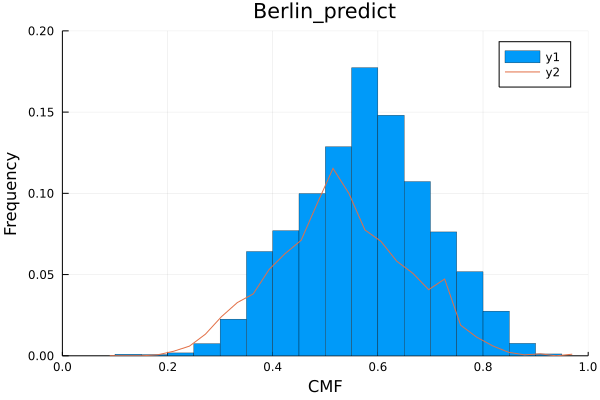

In [85]:
histogram(fcstSamples, normalize=:probability, bins=n, lw=0.3, 
    xlim=(0,1), ylim=(0,0.2), xlabel="CMF", ylabel="Frequency", 
    title="Berlin_predict")
plot!(binStarts, transProbs) #, lc=:blue)

In [8]:
cmf_data = cmf_bb_train

267607-element Vector{Float64}:
 0.25300818171573625
 0.25114843250478547
 0.22158832728772718
 0.18179115729880074
 0.15113926484883422
 0.165566104963329
 0.3466782860167718
 0.31671983957807137
 0.36398169822529436
 0.41458791214159674
 0.2877386670255639
 0.24396654210666427
 0.24159470981093112
 ⋮
 0.32742781316244157
 0.43239978237534843
 0.4847562973172902
 0.42879282344472974
 0.562585022521856
 0.5562563972920771
 0.740902732523057
 0.8464298692171635
 0.8553437322878059
 0.8214015279512967
 0.8961348158326929
 0.9577757923480762

In [27]:
# equal population
qx_ep = quantile(cmf_data, 0:(1/30):1)

31-element Vector{Float64}:
 0.0900346482311115
 0.19845949759237494
 0.2409067781933869
 0.26946708376590045
 0.2945530461470078
 0.32037413045072666
 0.34839012593267826
 0.37891459265564215
 0.4137052013032702
 0.44852957174822566
 0.49099578180061504
 0.5423505565005856
 0.5951202294339194
 ⋮
 0.8367313458445514
 0.8560362099398299
 0.8765232849420324
 0.902279354891852
 0.928341034591938
 0.9424088958914856
 0.9486330461551061
 0.9521029371562085
 0.9552602518874201
 0.9605250556635135
 0.974820620977865
 1.0

In [11]:
qx_ep[1] = 0
qx_ep

31-element Vector{Float64}:
 0.0
 0.19845949759237494
 0.2409067781933869
 0.26946708376590045
 0.2945530461470078
 0.32037413045072666
 0.34839012593267826
 0.37891459265564215
 0.4137052013032702
 0.44852957174822566
 0.49099578180061504
 0.5423505565005856
 0.5951202294339194
 ⋮
 0.8367313458445514
 0.8560362099398299
 0.8765232849420324
 0.902279354891852
 0.928341034591938
 0.9424088958914856
 0.9486330461551061
 0.9521029371562085
 0.9552602518874201
 0.9605250556635135
 0.974820620977865
 1.0

In [13]:
# equal length
qx_el = [i for i in 0:(1/30):1]

31-element Vector{Float64}:
 0.0
 0.03333333333333333
 0.06666666666666667
 0.1
 0.13333333333333333
 0.16666666666666666
 0.2
 0.23333333333333334
 0.26666666666666666
 0.3
 0.3333333333333333
 0.36666666666666664
 0.4
 ⋮
 0.6333333333333333
 0.6666666666666666
 0.7
 0.7333333333333333
 0.7666666666666667
 0.8
 0.8333333333333334
 0.8666666666666667
 0.9
 0.9333333333333333
 0.9666666666666667
 1.0

In [ ]:
min = minimum(cmf_data)
max = maximum(cmf_data);
binWidth = (max - min) / n

state = ceil.((cmf_data .- min) ./ binWidth)
state[argmin(state)] = 1
state = Int16.(state)

In [ ]:
T = zeros(n, n) # transition matrix
len = length(cmf_data)
for i in 2:len
    T[ state[i-1], state[i] ] = T[ state[i-1], state[i] ] + 1
end
T

In [ ]:
@model HiddenMarkovModel(y, K) = begin
    # get observation length
    N = length(y)
    # state sequence
    s = tzeros(Int, N)
    # emission matrix
    m = Vector(undef, K)
    # transition matrix
    T = Vector{Vector}(undef, K)
    
    # assign distri to each element of T & m
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        m[i] ~ 
    end
    
    # observe each point of input
    s[1] ~ Categorical(K)
#     y[1] ~ Uniform()
    
    for i = 2:N
        s[i] ~ Categorical( vec( T[ s[i-1] ] ) )
        y[i] ~ Uniform()
    end
end;

In [ ]:
y = state[1:15]

In [ ]:
plot(y, ylim=(0,11))

In [ ]:
# run sampler, Hamiltonian(leapfrog step size, n_leapfrog step), Particle Gibbs(n_particles, space)
g = Gibbs(HMC(0.001, 7, :m, :T), PG(20, :s)) 
c = sample(HiddenMarkovModel(y, n), g, 15); # return 100 samples

In [ ]:
m_set = c[:,101:111,:].value.data
s_set = c[:,112:126,:].value.data;

Ns = 1:length(c)

In [ ]:
animation = @animate for N in Ns
    m = m_set[i, :]; 
    s = Int.(s_set[i,:]);
    emissions = collect(skipmissing(m[s]))
    
    p = plot(y, c = :red,
        size = (500, 250),
        xlabel = "Time",
        ylabel = "State",
        legend = :topright, label = "True data",
        xlim = (0,15));
#         ylim = (-1,5));
    plot!(emissions, color = :blue, label = "Sample $N")
end every 10;

### try BSRN data

In [98]:
colnames = split("Date/Time	Height [m]	SWD [W/m**2]	SWD std dev [W/m**2]	SWD min [W/m**2]	SWD max [W/m**2]	DIR [W/m**2]	DIR std dev [W/m**2]	DIR min [W/m**2]	DIR max [W/m**2]	DIF [W/m**2]	DIF std dev [W/m**2]	DIF min [W/m**2]	DIF max [W/m**2]	LWD [W/m**2]	LWD std dev [W/m**2]	LWD min [W/m**2]	LWD max [W/m**2]	SWU [W/m**2]	SWU std dev [W/m**2]	SWU min [W/m**2]	SWU max [W/m**2]	LWU [W/m**2]	LWU std dev [W/m**2]	LWU min [W/m**2]	LWU max [W/m**2]	T2 [°C]	RH [%]	PoPoPoPo [hPa]", '	')

29-element Vector{SubString{String}}:
 "Date/Time"
 "Height [m]"
 "SWD [W/m**2]"
 "SWD std dev [W/m**2]"
 "SWD min [W/m**2]"
 "SWD max [W/m**2]"
 "DIR [W/m**2]"
 "DIR std dev [W/m**2]"
 "DIR min [W/m**2]"
 "DIR max [W/m**2]"
 "DIF [W/m**2]"
 "DIF std dev [W/m**2]"
 "DIF min [W/m**2]"
 ⋮
 "LWD max [W/m**2]"
 "SWU [W/m**2]"
 "SWU std dev [W/m**2]"
 "SWU min [W/m**2]"
 "SWU max [W/m**2]"
 "LWU [W/m**2]"
 "LWU std dev [W/m**2]"
 "LWU min [W/m**2]"
 "LWU max [W/m**2]"
 "T2 [°C]"
 "RH [%]"
 "PoPoPoPo [hPa]"

In [100]:
df = CSV.File("PAY_radiation_2020-07.tab"; header=false, skipto=42, delim='	', silencewarnings=true) |> DataFrame

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20
,DateTim…,Int64,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?
1,2020-07-01T00:00:00,2,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,2020-07-01T00:01:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,0,337,0.2,337,338,0,0.1
3,2020-07-01T00:02:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,0,337,0.1,337,338,0,0.1
4,2020-07-01T00:03:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,1,337,0.1,337,337,0,0.1
5,2020-07-01T00:04:00,2,0,0.1,0,0,0,0.0,0,0,0,0.3,-1,1,337,0.1,337,337,0,0.1
6,2020-07-01T00:05:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,0,337,0.1,337,337,0,0.1
7,2020-07-01T00:06:00,2,0,0.1,0,0,0,0.0,0,0,0,0.3,-1,1,337,0.1,336,337,0,0.1
8,2020-07-01T00:07:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,0,337,0.1,336,337,0,0.1
9,2020-07-01T00:08:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,0,1,337,0.1,337,337,0,0.1


In [101]:
rename!(df, colnames)

,Date/Time,Height [m],SWD [W/m**2],SWD std dev [W/m**2],SWD min [W/m**2],SWD max [W/m**2],DIR [W/m**2],DIR std dev [W/m**2],DIR min [W/m**2],DIR max [W/m**2],DIF [W/m**2],DIF std dev [W/m**2]
,DateTim…,Int64,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?
1,2020-07-01T00:00:00,2,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,2020-07-01T00:01:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2
3,2020-07-01T00:02:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2
4,2020-07-01T00:03:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2
5,2020-07-01T00:04:00,2,0,0.1,0,0,0,0.0,0,0,0,0.3
6,2020-07-01T00:05:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2
7,2020-07-01T00:06:00,2,0,0.1,0,0,0,0.0,0,0,0,0.3
8,2020-07-01T00:07:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2
9,2020-07-01T00:08:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2


In [111]:
rad = df."SWD [W/m**2]"

44607-element Vector{Union{Missing, Int64}}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [109]:
rad = filter!(rad -> !ismissing(rad), rad)

44607-element Vector{Union{Missing, Int64}}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [112]:
describe(rad)

LoadError: MethodError: no method matching describe(::Vector{Union{Missing, Int64}})
[0mClosest candidates are:
[0m  describe([91m::AbstractDataFrame[39m; cols) at C:\Users\xinyuan.hou\.julia\packages\DataFrames\nxjiD\src\abstractdataframe\abstractdataframe.jl:573
[0m  describe([91m::AbstractDataFrame[39m, [91m::Union{Symbol, Pair{var"#s15", var"#s14"} where {var"#s15"<:Union{Function, Type}, var"#s14"<:Union{AbstractString, Symbol}}}...[39m; cols) at C:\Users\xinyuan.hou\.julia\packages\DataFrames\nxjiD\src\abstractdataframe\abstractdataframe.jl:570

In [114]:
maximum(rad)

1277

In [115]:
minimum(rad)

-1

In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
p = plot([sin, cos], zeros(0), leg = false, xlims = (0, 2π), ylims = (-1, 1))
anim = Animation()
for x = range(0, stop = 2π, length = 20)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end